In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Acidente ambiental

13755 rows × 70 columns

In [165]:
df_acidentes = pd.read_csv('http://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:adm_comunicacidente_p&outputFormat=csv')

<ipython-input-165-9d676d2329ca>:1: DtypeWarning: Columns (11,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acidentes = pd.read_csv('http://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:adm_comunicacidente_p&outputFormat=csv')


In [166]:
df_acidentes.head()

,FID,uuid,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_complemento_tipo_localizaca,des_complemento_tipo_evento,des_complemento_instituicao_atu,des_complemento_tipo_dano_ident,...,dia_semana_primeira_obs,dia_semana_registro,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,produtos_onu,produtos_outro,geom,dt_carga,feicao_proxima
0,adm_comunicacidente_p.fid-1c8e3c3c_1917a3a5b04...,9d1f1f3a-0840-4de9-9019-f3a8cec09a72,312,2706901.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Mídia,Óbitos/feridos,NaN,NaN,POINT (-35.9511275 -9.6016711),2023-05-21T20:44:35,NaN
1,adm_comunicacidente_p.fid-1c8e3c3c_1917a3a5b04...,9e1b47f8-72de-4db9-aeb2-ffc7fd52b306,313,3205309.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros,Mídia,Outro(s),NaN,NaN,POINT (-40.3016327 -20.2996826),2023-05-21T20:44:35,NaN
2,adm_comunicacidente_p.fid-1c8e3c3c_1917a3a5b04...,7404e435-94ec-4f3a-b46d-409b0bd9b310,314,5003702.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Fauna;Flora;População afetada/evacuada;Rio/cór...,NaN,NaN,POINT (-54.812208 -22.2206145),2023-05-21T20:44:35,NaN
3,adm_comunicacidente_p.fid-1c8e3c3c_1917a3a5b04...,e6338a4d-cdc1-4bde-b037-366019617cc6,315,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Defesa Civil,Mídia,Solo,NaN,NaN,POINT (-47.9768478 -15.82326),2023-05-21T20:44:35,NaN
4,adm_comunicacidente_p.fid-1c8e3c3c_1917a3a5b04...,f1085ea1-6007-466d-a850-77d5023ad819,316,4312054.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Rio/córrego;Solo,NaN,NaN,POINT (-52.097268 -29.331113),2023-05-21T20:44:35,NaN


In [167]:
df_acidentes.columns

Index(['FID', 'uuid', 'id_ocorrencia', 'id_municipio', 'id_uf',
       'id_responsavel', 'des_complemento_tipo_localizaca',
       'des_complemento_tipo_evento', 'des_complemento_instituicao_atu',
       'des_complemento_tipo_dano_ident', 'des_danos', 'des_ocorrencia',
       'dt_ocorrencia', 'hr_ocorrencia', 'dt_registro',
       'des_informacoes_adicionais', 'plano_emergencia',
       'plano_emergencia_acionado', 'iniciados_outras_providencias',
       'des_outras_providencias', 'ocorrencia_oleo', 'dt_primeira_obs',
       'hr_primeira_obs', 'informacao_geografica', 'informacao_responsavel',
       'acao_inicial_tomada', 'des_causa_provavel', 'situacao_atual_descarga',
       'nro_ocorrencia', 'endereco_ocorrencia', 'nome_instituicao_atuando',
       'telefone_instituicao_atuando', 'tipo_substancia', 'volume_estimado',
       'produto_nao_se_aplica', 'produto_perigoso', 'produto_nao_especificado',
       'id_bacia_sedimentar', 'legado', 'des_instituicao_empresa',
       'nome_comunic

In [168]:
lista_nan = df_acidentes.columns[df_acidentes.isna().any()].tolist()
for i in lista_nan:
  quantidade_nan = df_acidentes[i].isna().sum()
  print(i, ':', quantidade_nan)
  if quantidade_nan > 7000:
    df_acidentes = df_acidentes.drop(columns=[i])

df_acidentes = df_acidentes.drop(columns=["dt_ocorrencia", "hr_ocorrencia", "dt_primeira_obs", "hr_primeira_obs", "dt_ocorrencia_feriado",
                                          "id_responsavel", "cpf_contato", "id_municipio", "id_uf", "informacao_geografica", "ip_contato",
                                          "nro_ocorrencia", "nome_comunicante", "dt_carga", "telefone_contato", "des_funcao_comunicante",
                                          "email_comunicante", "FID", "uuid", "id_ocorrencia"])

id_municipio : 2688
id_uf : 919
id_responsavel : 6745
des_complemento_tipo_localizaca : 9399
des_complemento_tipo_evento : 9506
des_complemento_instituicao_atu : 8609
des_complemento_tipo_dano_ident : 10131
des_danos : 13755
des_ocorrencia : 7980
dt_ocorrencia : 6197
hr_ocorrencia : 645
des_informacoes_adicionais : 13755
plano_emergencia : 6581
des_outras_providencias : 8328
dt_primeira_obs : 6035
hr_primeira_obs : 6106
informacao_geografica : 6894
acao_inicial_tomada : 13755
des_causa_provavel : 6440
situacao_atual_descarga : 11127
endereco_ocorrencia : 6299
nome_instituicao_atuando : 12064
telefone_instituicao_atuando : 12261
tipo_substancia : 12052
volume_estimado : 12212
produto_nao_se_aplica : 12283
produto_perigoso : 11650
produto_nao_especificado : 12523
id_bacia_sedimentar : 11464
des_instituicao_empresa : 6620
des_obs : 7384
cpf_contato : 5798
tipo_comunicado : 6861
periodo_ocorrencia : 793
periodo_primeira_obs : 6269
municipio : 2883
uf : 953
bacia_sedimentar : 11464
origem :

In [169]:
lista_nan = df_acidentes.columns[df_acidentes.isna().any()].tolist()
for i in lista_nan:
  quantidade_nan = df_acidentes[i].isna().sum()
  print(i, ':', quantidade_nan)

plano_emergencia : 6581
des_causa_provavel : 6440
endereco_ocorrencia : 6299
des_instituicao_empresa : 6620
tipo_comunicado : 6861
periodo_ocorrencia : 793
periodo_primeira_obs : 6269
municipio : 2883
uf : 953
origem : 173
tipo_evento : 145
institiuicoes_atuando_local : 1659
tipos_fontes_informacoes : 343
tipos_danos_identificados : 941


In [170]:
df_acidentes.columns

Index(['dt_registro', 'plano_emergencia', 'plano_emergencia_acionado',
       'iniciados_outras_providencias', 'ocorrencia_oleo',
       'informacao_responsavel', 'des_causa_provavel', 'endereco_ocorrencia',
       'legado', 'des_instituicao_empresa', 'validado', 'tipo_comunicado',
       'periodo_ocorrencia', 'periodo_primeira_obs', 'municipio', 'uf',
       'origem', 'tipo_evento', 'institiuicoes_atuando_local',
       'tipos_fontes_informacoes', 'tipos_danos_identificados', 'geom'],
      dtype='object')

In [171]:
#df_acidentes['id_ocorrencia'].value_counts()

In [172]:
df_acidentes['dt_registro_mod'] = pd.to_datetime(df_acidentes['dt_registro'])
df_acidentes['registro_ano'] = df_acidentes['dt_registro_mod'].dt.year

Após limpeza inicial: 24 colunas

In [173]:
bar_df = pd.DataFrame(df_acidentes['uf'].value_counts()).reset_index()
bar_df

,uf,count
0,MG,3474
1,SP,2462
2,RJ,2123
3,PR,643
4,BA,545
5,RS,509
6,SC,437
7,ES,416
8,SE,228
9,MS,216


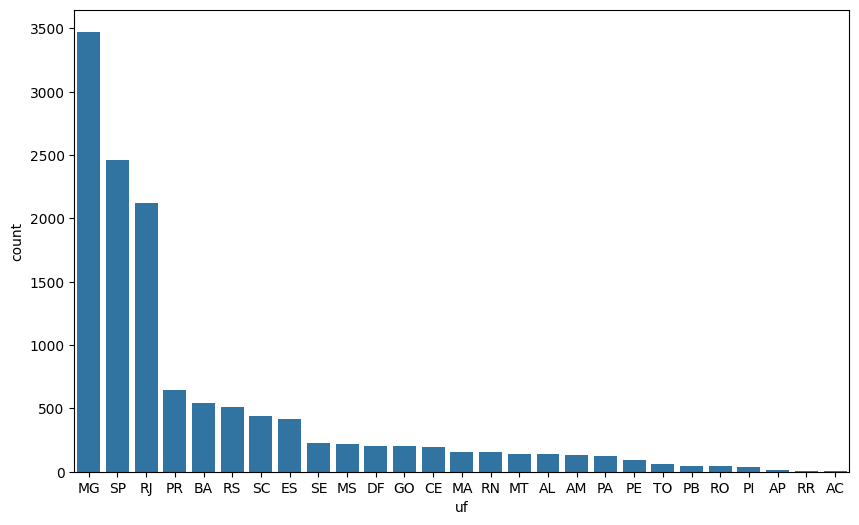

In [174]:
plt.figure(figsize=(10,6))
ax = sns.barplot(bar_df, x=bar_df['uf'], y=bar_df['count'])
plt.show()

In [175]:
bar_df2 = pd.DataFrame(df_acidentes['registro_ano'].value_counts()).reset_index()
bar_df2

,registro_ano,count
0,2010,1378
1,2019,1270
2,2011,1213
3,2021,1097
4,2012,1091
5,2022,1062
6,2018,1056
7,2017,914
8,2020,894
9,2009,889


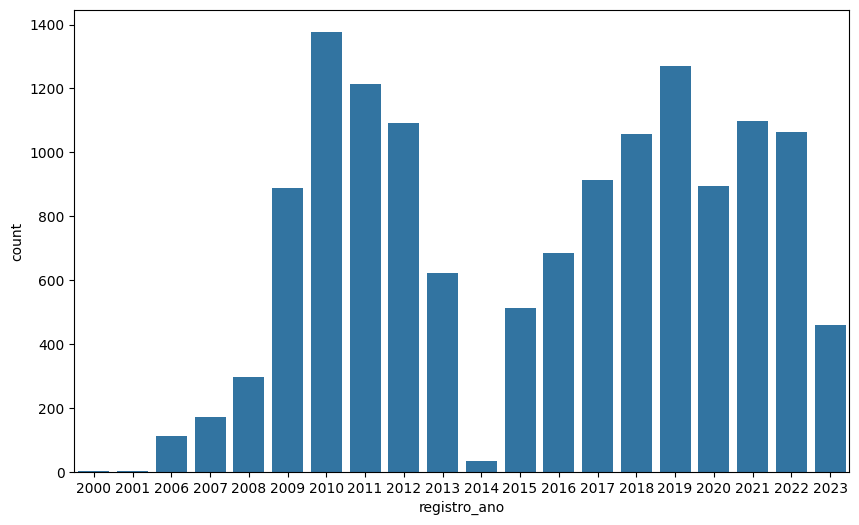

In [176]:
plt.figure(figsize=(10,6))
ax = sns.barplot(bar_df2, x=bar_df2['registro_ano'], y=bar_df2['count'])
plt.show()

In [178]:
bar_df3 = pd.DataFrame(df_acidentes['ocorrencia_oleo'].value_counts()).reset_index()
bar_df3

,ocorrencia_oleo,count
0,N,10890
1,S,2865


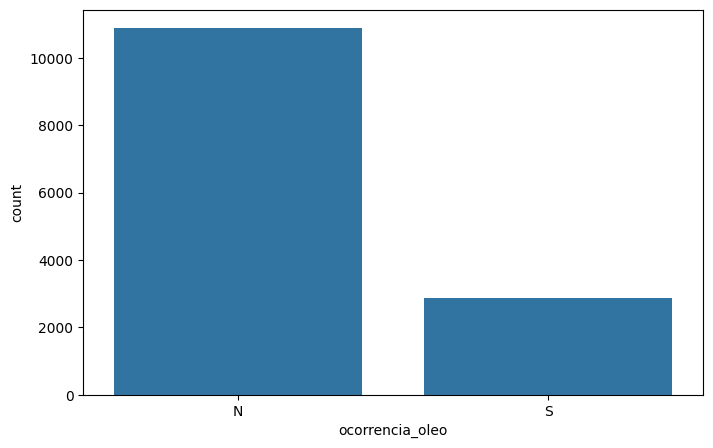

In [179]:
plt.figure(figsize=(8,5))
ax = sns.barplot(bar_df3, x=bar_df3['ocorrencia_oleo'], y=bar_df3['count'])
plt.show()

In [177]:
df_acidentes.columns

Index(['dt_registro', 'plano_emergencia', 'plano_emergencia_acionado',
       'iniciados_outras_providencias', 'ocorrencia_oleo',
       'informacao_responsavel', 'des_causa_provavel', 'endereco_ocorrencia',
       'legado', 'des_instituicao_empresa', 'validado', 'tipo_comunicado',
       'periodo_ocorrencia', 'periodo_primeira_obs', 'municipio', 'uf',
       'origem', 'tipo_evento', 'institiuicoes_atuando_local',
       'tipos_fontes_informacoes', 'tipos_danos_identificados', 'geom',
       'dt_registro_mod', 'registro_ano'],
      dtype='object')

In [184]:
df_acidentes['tipo_evento'].value_counts()

,count
tipo_evento,
Outro(s),6578
Derramamento de líquidos,4791
Lançamento de sólidos,993
Explosão/incêndio,270
Vazamento de gases,164
Explosão/incêndio;Outro(s),152
Derramamento de líquidos;Lançamento de sólidos,130
Derramamento de líquidos;Explosão/incêndio,98
Produtos químicos/embalagens abandonadas,70


In [185]:
df_acidentes['tipos_danos_identificados'].value_counts()

,count
tipos_danos_identificados,
Mar,3263
Outro(s),3042
Solo,2296
Atmosfera,882
Rio/córrego,375
...,...
Outro(s);População afetada/evacuada;Rio/córrego;Solo,1
Fauna;Flora;Mar;Outro(s);População afetada/evacuada;Praia,1
Fauna;Flora;Óbitos/feridos;Rio/córrego;Solo,1
